In [3]:
# Bibliotecas

import json
import os
import matplotlib.pyplot as plt

from PIL import Image
from math import floor

In [4]:
# Función que carga un un json con los captions
def load_json(path_to_captions):
    with open(path_to_captions) as json_file:
        data = json.load(json_file)
    
    return data

In [14]:
data = load_json("TextCaps/TextCaps_0.1_val.json")
print(len(data['data']))

15830


In [6]:
def print_captions(img_id, json_dict):
    img_path = os.path.join("TextCaps/train/train_val_images", img_id+".jpg")
    data = json_dict['data']
    captions = []
    for caption in data:
        if caption['image_id'] == img_id:
            captions.append(caption['caption_str'])
    
    return img_path, captions

def get_new_size(img, resize_max):
    width, height = img.size
    max_width, max_height = resize_max[0], resize_max[1]
    downsample_ratio = min(max_width/width, max_height/height)
    new_width = floor(downsample_ratio * width)
    new_heigth = floor(downsample_ratio * height)
    
    return new_width, new_heigth

def viz_captions(npic, json_data):
    # Datos
    data = json_data['data']
    captions_data = []
    
    # Recuperando image_ids y sus descripciones
    for caption in data[:npic]:
        temp_captions = []
        temp_captions.extend(caption['reference_strs'])
        image_id = caption['image_id']
        captions_data.append((image_id, temp_captions))
    
    # Ploteando las imágenes y sus descripciones
    count = 1
    fig = plt.figure(figsize=(10,20))
    for img in captions_data:
        # Captions
        captions = img[1]
        
        # Cargando la imagen
        img_path =  os.path.join("TextCaps/train/train_val_images", img[0]+".jpg")
        img = Image.open(img_path)
        height, width = get_new_size(img, (500, 500))
        img = img.resize((height, width))
        
        # Ploteando la imagen
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(img)
        count += 1
        
        # Ploteando las descripciones
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(-1,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=10)
        count += 1

In [7]:
# Función que visualiza un dataset especificado por su ruta
def viz_dataset(n_imgs, path_to_json):
    loaded_json = load_json(path_to_json)
    viz_captions(n_imgs, loaded_json)

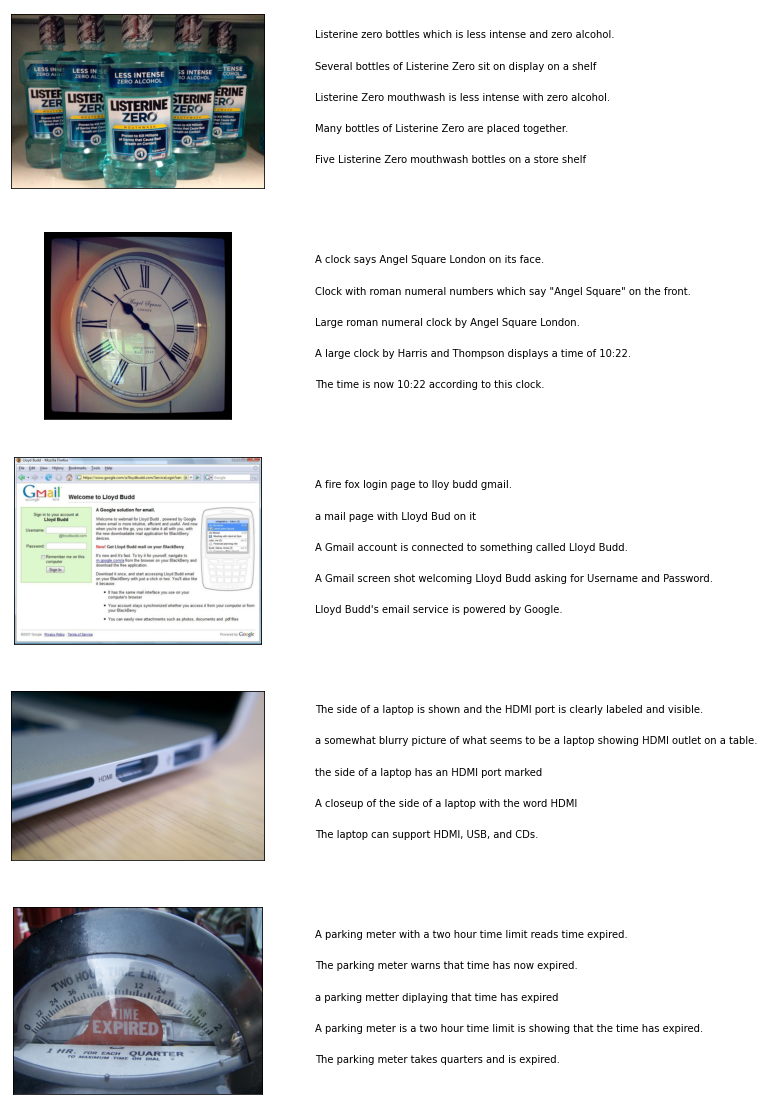

In [8]:
# Visualizando el dataset original
viz_dataset(5, "TextCaps/train/TextCaps_0.1_train.json")

In [ ]:
# Visualizando el dataset traducido
viz_dataset(5, "es_TextCaps/train/TextCaps_0.1_train.json")